# Reaction Net project Group E
This notebook exposes the results of **column E** group.   
The M1/M2 students of the group were: L.Pinault and T.Sterin.    
In the following in corresponds to column **4** (counting from 0) in 2 experiments plots.   

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Question 1
We grab the data

In [2]:
import csv
 
fname = "exp.csv"
file = open(fname, "r")
reader = csv.reader(file)
data = {}
k = 0
l = 0
raw_data = []
for row in reader:
    if k!= 0:
        if not l in data:
            data[l] = []
        raw_data.append(row)
        data[l].append(k-1)
        #print(row)
    if k != 0 and k%96 == 0:
        l += 1
    k += 1
for d in data:
    data[d] = np.asarray(data[d]).reshape(8,12)
file.close()

In [3]:
def get_data_ij(i,j,f):
    x = range(316)
    y = []
    for t in x:
        y.append(float(raw_data[data[t][i][j]][f]))
    return y
def get_data_ij2(i,j):
    tt = range(316)
    x = []
    y = []
    for t in tt:
        x.append(float(raw_data[data[t][i][j]][2]))
        y.append(float(raw_data[data[t][i][j]][3]))
    return x,y

We plot it

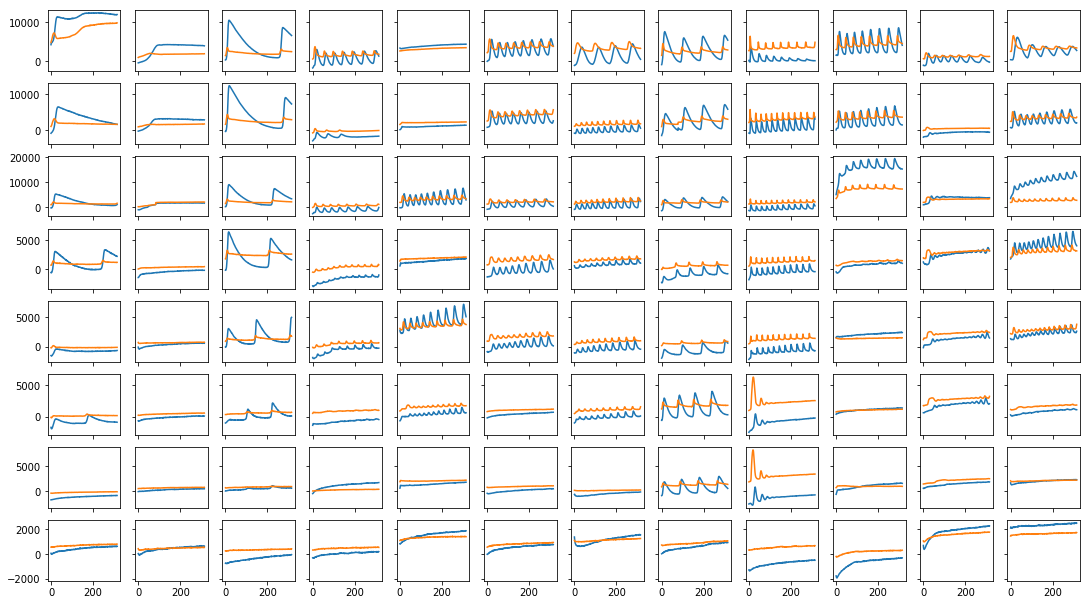

In [4]:
"""Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.
"""

import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = range(316)

plt.close('all')

# row and column sharing
f, ax = plt.subplots(8, 12, sharex='col', sharey='row')
f.set_size_inches(18.5, 10.5)
for i in range(8):
    for j in range(12):
        ax[i][j].plot(x,get_data_ij(i,j,2))
        ax[i][j].plot(x,get_data_ij(i,j,3))
plt.show()

**Group E:** we see that our results are not good for rows 0,1 and 3 but seem ok on the rest.

# Question 2
We plot trajectories

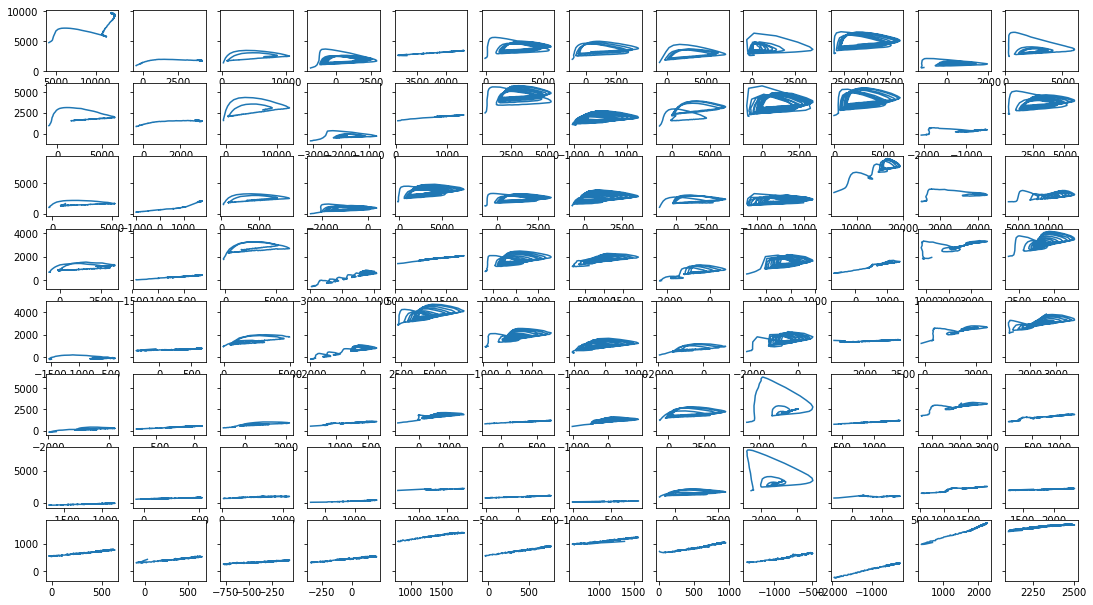

In [5]:
"""Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.
"""

import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
plt.close('all')

# row and column sharing
f2, ax2 = plt.subplots(8, 12, sharey='row')
f2.set_size_inches(18.5, 10.5)
for i in range(8):
    for j in range(12):
        x,y = get_data_ij2(i,j)
        ax2[i][j].plot(x,y)

plt.show()

# Question 3
From the following plot we deduce blue is predator and orange is prey

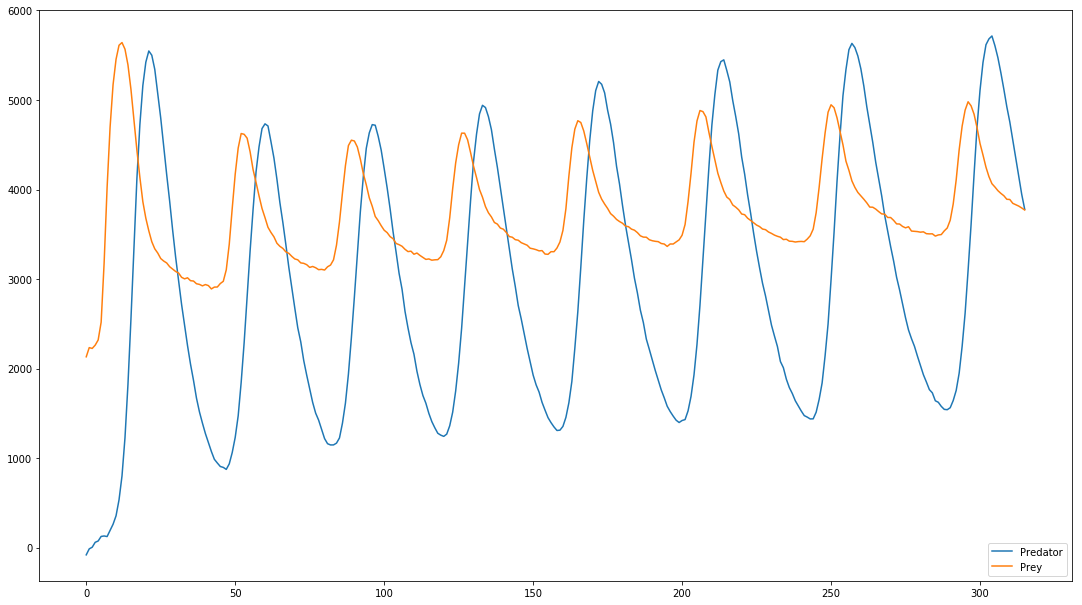

In [6]:
x = range(316)
f3, ax3 = plt.subplots(1, 1)
f3.set_size_inches(18.5, 10.5)
ax3.plot(x,get_data_ij(0,5,2),label='Predator')
ax3.plot(x,get_data_ij(0,5,3),label='Prey')
ax3.legend()
plt.show()

# Question 4
Period heatmap    
We use a FFT to estimate the period, we **substract the signal by its mean** to get rid of the peak at f=0.0

In [7]:
def get_period(signal,p=False):
    signal = np.asarray(signal)
    #print(signal)
    signal = signal-signal.mean()
    spectrum = np.fft.fft(signal)
    freq = np.fft.fftfreq(len(spectrum))
    last_m = 0
    last_freq = 0
    new_x = []
    new_y = []
    for (i,the_freq) in enumerate(freq):
        if the_freq > 0.0001 and abs(spectrum)[i] >= last_m:
            last_m = abs(spectrum)[i]
            last_freq = the_freq
        if True:
            new_x.append(the_freq)
            new_y.append(abs(spectrum)[i])
    if p:
        plt.plot(new_x,new_y)
            #print(last_freq)
    #if 1/last_freq == 316.0:
        #return 0.0
    if p:
        print(last_freq)
    return 1/last_freq

In [8]:
heat_map_pred = []
for i in range(8):
    for j in range(12):
        heat_map_pred.append(get_period(get_data_ij(i,j,2)))
heat_map_pred = np.asarray(heat_map_pred).reshape((8,12))
heat_map_proy = []
for i in range(8):
    for j in range(12):
        heat_map_proy.append(get_period(get_data_ij(i,j,3)))
heat_map_pred = np.asarray(heat_map_pred).reshape((8,12))
heat_map_proy = np.asarray(heat_map_proy).reshape((8,12))

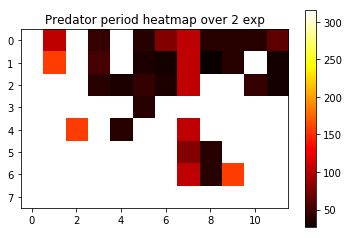

In [9]:
plt.imshow(heat_map_proy, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Predator period heatmap over 2 exp')
plt.show()

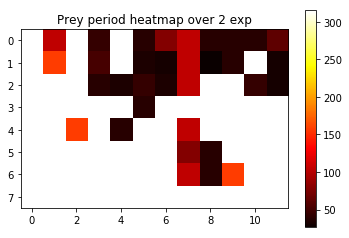

In [10]:
plt.imshow(heat_map_proy, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Prey period heatmap over 2 exp')
plt.show()

We compute the mean between prey and proy signals (they are very similar as the heatmaps shows)

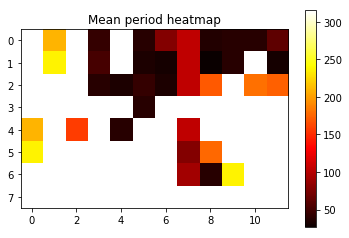

In [11]:
heat_map_mean = (heat_map_proy+heat_map_pred)/2
plt.imshow(heat_map_mean, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Mean period heatmap')
plt.show()

## Important Remark ##
In the next we **deliberataly** have kept the results from both instances of the experiment.   
Indeed, even if we think that some of them have failed, we do not keep only the one that we think have succeded.   
We present the result as they come to avoid the bias of forcing reality to match our model.   
Further analysis of the experiments could lead to a wise choosing but we don't think we have the necessary knowledge to do so.    
At the end of the analysis we show the experiments that matches best the model on both instances.

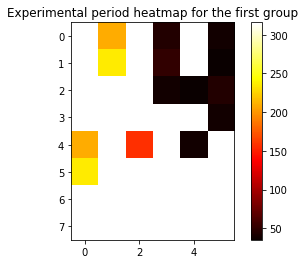

In [12]:
heat_map_exp1=[]
heat_map_exp2=[]
for i in range(8):
    for j in range(6):
        heat_map_exp1.append(heat_map_mean[i][j])
        heat_map_exp2.append(heat_map_mean[i][j+6])
heat_map_exp1 = np.asarray(heat_map_exp1).reshape((8,6))
heat_map_exp2 = np.asarray(heat_map_exp2).reshape((8,6))
plt.imshow(heat_map_exp1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Experimental period heatmap for the first group')
plt.show()

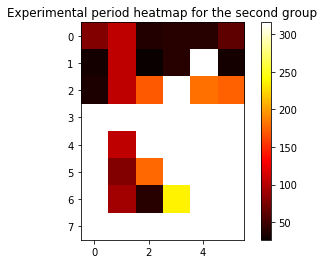

In [13]:
plt.imshow(heat_map_exp2, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Experimental period heatmap for the second group')
plt.show()

# Question 5
Modele theorique pour g=exo=1

In [14]:
from scipy import integrate
def dy_dt(t, y, g, exo):
            
    prey = y[0]
    pred = y[1]
    y = np.zeros((2,1))
    y[0] = (g*prey)/(1+(g/2)*prey)-prey*pred-0.3*exo*prey/(1+pred)
    y[1] = prey*pred - exo*(pred)/(1+pred)
    return y
 
def model_results(g,exo):
    r = integrate.ode(dy_dt).set_integrator('vode', method='bdf')
    # Part 1:
    ICs = [0.1, 0.1]
    # Part 2: use the steady-state solution
    t_0 = 0.0
    r.set_initial_value(ICs, t_0).set_f_params(g,exo)
    t_final = 100.0
    dt = 0.5

    # Create vectors to store the solutions in; 
    #     add extra space for intial condition
    n_steps = np.floor((t_final - t_0)/dt) + 1
    n_steps = n_steps.astype(np.int64)
    time = np.zeros(n_steps)
    N = np.zeros(n_steps)
    B = np.zeros(n_steps)
    N[0], B[0] = ICs
    k = 1
    while r.successful() and r.t < t_final:
        r.integrate(r.t + dt)
        time[k] = r.t
    
        N[k] = r.y[0]
        B[k] = r.y[1]
        k += 1
    return time,B,N

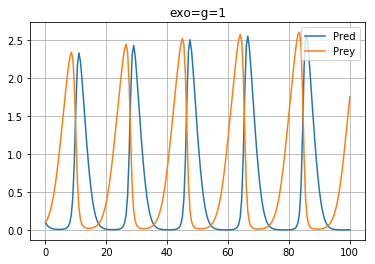

In [15]:
time,B,N = model_results(1.0,1.0)
plt.plot(time, B, label='Pred')
plt.plot(time, N, label='Prey')
plt.legend(loc='best')
plt.title("exo=g=1")
plt.grid('on')

# Question 6
g,exo generaux

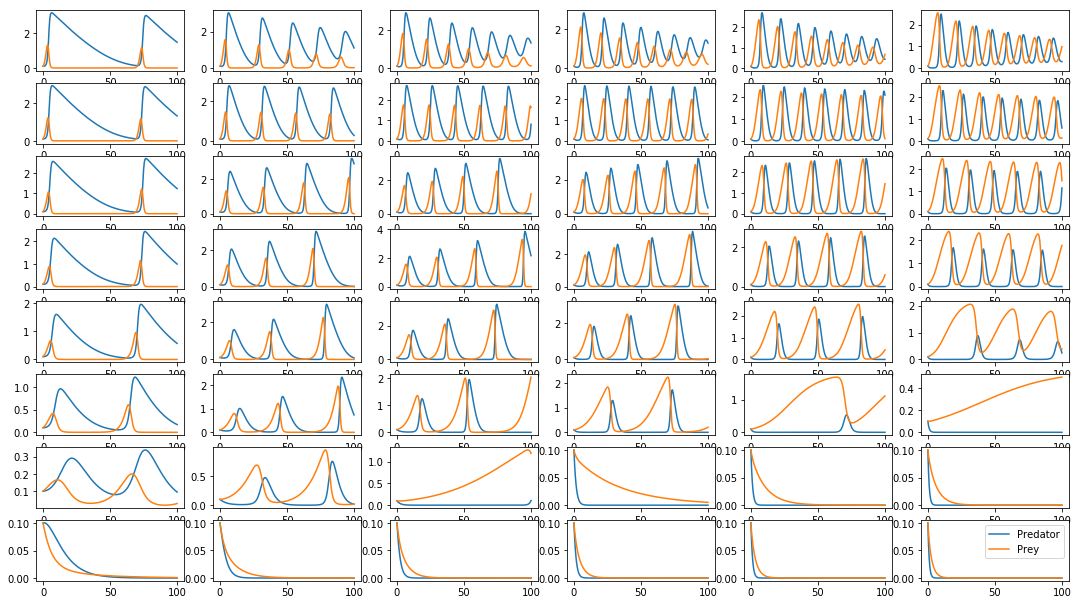

In [16]:
f_model, ax_model = plt.subplots(8, 6)
f_model.set_size_inches(18.5, 10.5)

param_g = np.linspace(0,1.4,8)
param_exo = np.linspace(0.1,1.2,6)

for i in range(8):
    for j in range(6):
        time,B,N = model_results(param_g[7-i],param_exo[j])
        ax_model[i][j].plot(time,B,label='Predator')
        ax_model[i][j].plot(time,N,label='Prey')
plt.legend(loc='best')
plt.show()

Theoretical heatmap

In [17]:
heat_map1 = []
heat_map2 = []
for i in range(8):
    for j in range(6):
        time,B,N = model_results(param_g[7-i],param_exo[j])
        heat_map1.append(get_period(B-B.mean()))
        heat_map2.append(get_period(N-N.mean()))
heat_map1 = np.asarray(heat_map1).reshape((8,6))
heat_map2 = np.asarray(heat_map1).reshape((8,6))

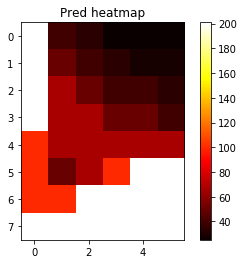

In [18]:
plt.imshow(heat_map1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Pred heatmap")
plt.show()

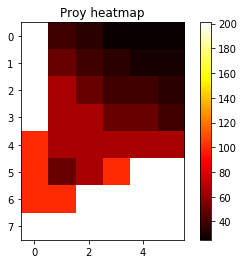

In [19]:
plt.imshow(heat_map2, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Proy heatmap")
plt.show()

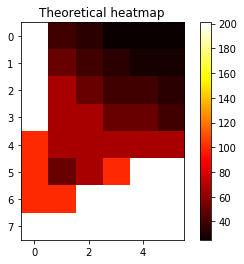

In [20]:
heat_map_theor = (heat_map1+heat_map2)/2
plt.imshow(heat_map_theor, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Theoretical heatmap")
plt.show()

# Question 7
We plot the abs difference between our theoretical and experimental results
We hope for a 0 matrix

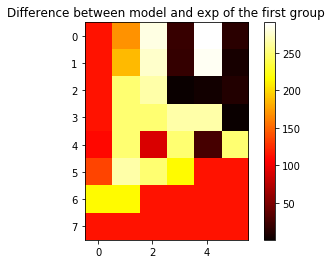

In [23]:
heat_map_result1 = abs(heat_map_theor-heat_map_exp1)
plt.imshow(heat_map_result1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Difference between model and exp of the first group')
plt.show()

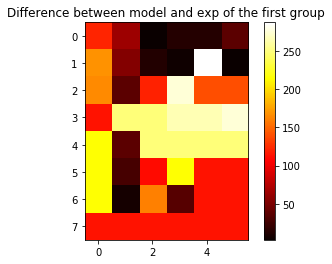

In [24]:
heat_map_result2 = abs(heat_map_theor-heat_map_exp2)
plt.imshow(heat_map_result2, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Difference between model and exp of the first group')
plt.show()

The black spot represents success match.    
It differs :( quite often

## Best matches
We eventually plot the result that matches best on the 2 experiments

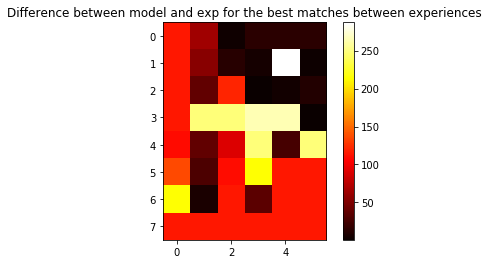

In [27]:
heat_map_best_matches = []
for i in range(8):
    for j in range(6):
        heat_map_best_matches.append(min(heat_map_result1[i][j],heat_map_result2[i][j]))
heat_map_best_matches = np.asarray(heat_map_best_matches).reshape((8,6))
plt.imshow(heat_map_best_matches, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Difference between model and exp for the best matches between experiences')
plt.show()